Theoretical: Mean = 5, Variance = 5
Empirical:   Mean = 4.98, Variance = 4.89


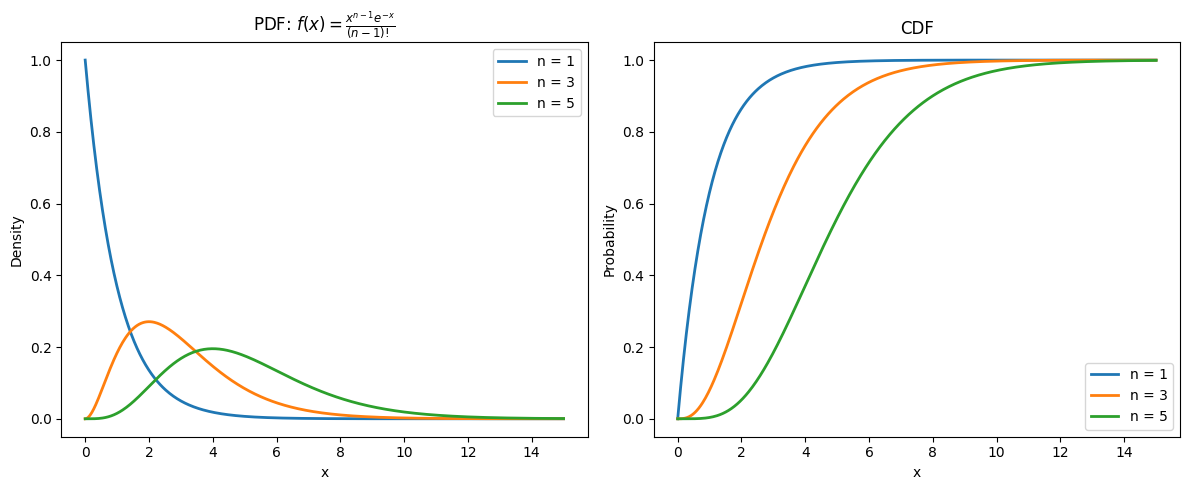

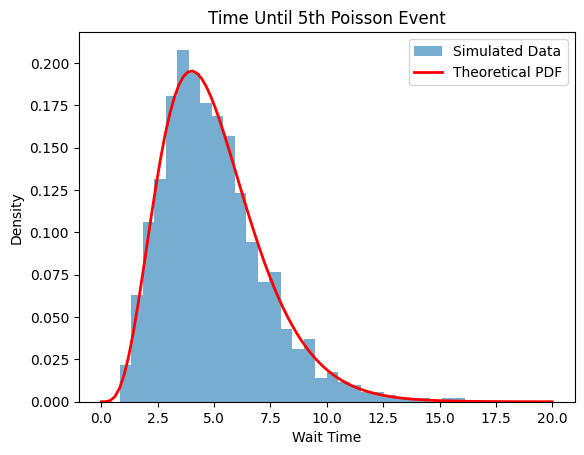

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import math

#----------------------------------------------------------------
# 1. Define the Gamma PDF and CDF (manual and SciPy implementations)
#----------------------------------------------------------------

def gamma_pdf(x, n):
    """Manual implementation of the Gamma PDF for integer shape parameter n."""
    return (x ** (n-1) * np.exp(-x)) / math.factorial(n-1)

def gamma_cdf(x, n):
    """CDF using SciPy's Gamma distribution (shape = n, rate = 1)."""
    return gamma.cdf(x, a=n, scale=1)

#----------------------------------------------------------------
# 2. Generate random samples and calculate statistics
#----------------------------------------------------------------

def generate_gamma_samples(n, num_samples=10000):
    """Generate random samples from the Gamma distribution."""
    return gamma.rvs(a=n, scale=1, size=num_samples)

# Example usage
n = 5  # Shape parameter
samples = generate_gamma_samples(n)

# Theoretical vs empirical statistics
print(f"Theoretical: Mean = {n}, Variance = {n}")
print(f"Empirical:   Mean = {np.mean(samples):.2f}, Variance = {np.var(samples):.2f}")

#----------------------------------------------------------------
# 3. Plot PDF and CDF for visualization
#----------------------------------------------------------------

def plot_gamma(n_values=[1, 3, 5]):
    """Plot PDFs and CDFs for different shape parameters n."""
    x = np.linspace(0, 15, 500)
    
    plt.figure(figsize=(12, 5))
    
    # PDFs
    plt.subplot(1, 2, 1)
    for n in n_values:
        plt.plot(x, gamma_pdf(x, n), lw=2, label=f'n = {n}')
    plt.title('PDF: $f(x) = \\frac{x^{n-1}e^{-x}}{(n-1)!}$')
    plt.xlabel('x'), plt.ylabel('Density'), plt.legend()

    # CDFs
    plt.subplot(1, 2, 2)
    for n in n_values:
        plt.plot(x, gamma_cdf(x, n), lw=2, label=f'n = {n}')
    plt.title('CDF')
    plt.xlabel('x'), plt.ylabel('Probability'), plt.legend()

    plt.tight_layout()
    plt.show()

plot_gamma()

#----------------------------------------------------------------
# 4. Practical Example: Modeling Wait Times
#----------------------------------------------------------------

# Simulate waiting time for n=5 events (e.g., 5 customer arrivals)
wait_times = generate_gamma_samples(n=5, num_samples=1000)

plt.hist(wait_times, bins=30, density=True, alpha=0.6, label='Simulated Data')
x = np.linspace(0, 20, 100)
plt.plot(x, gamma_pdf(x, 5), 'r-', lw=2, label='Theoretical PDF')
plt.title('Time Until 5th Poisson Event')
plt.xlabel('Wait Time'), plt.ylabel('Density'), plt.legend()
plt.show()


Case 1: λ1 = λ2 = 1


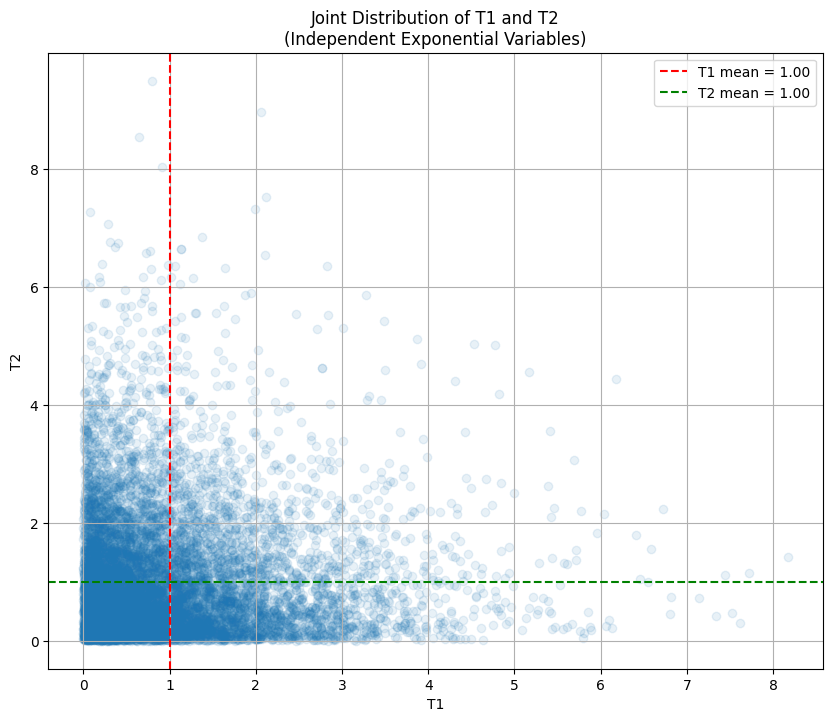

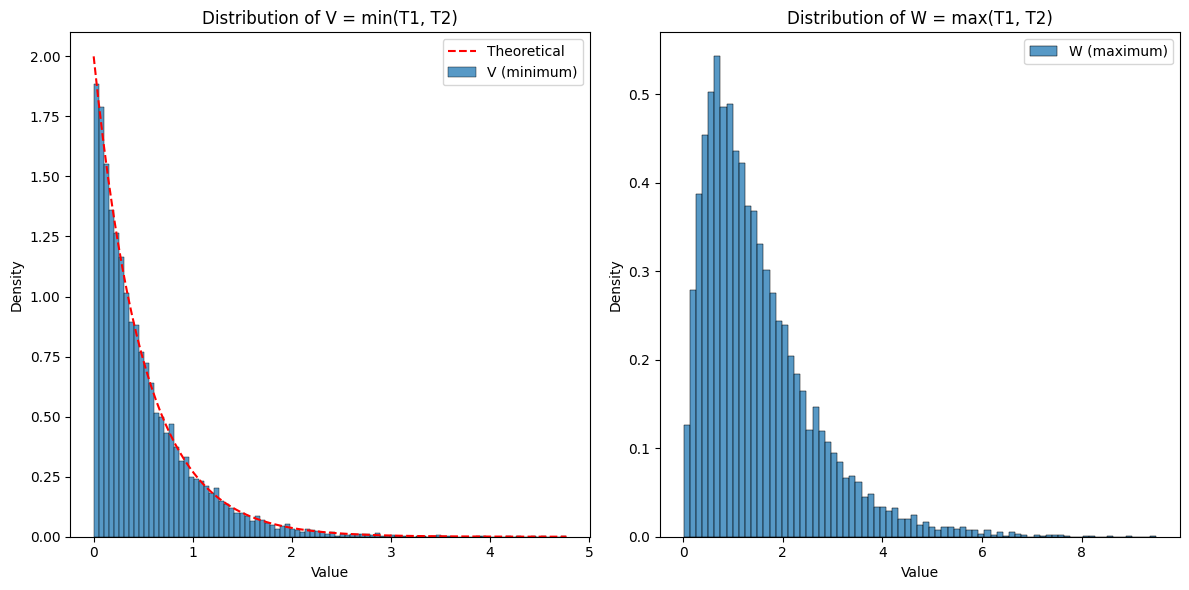

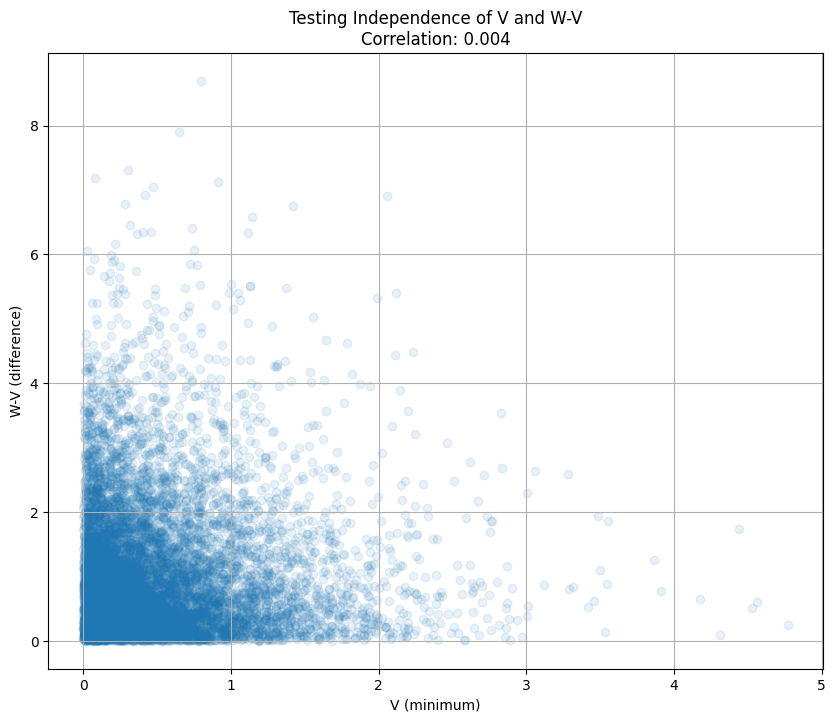

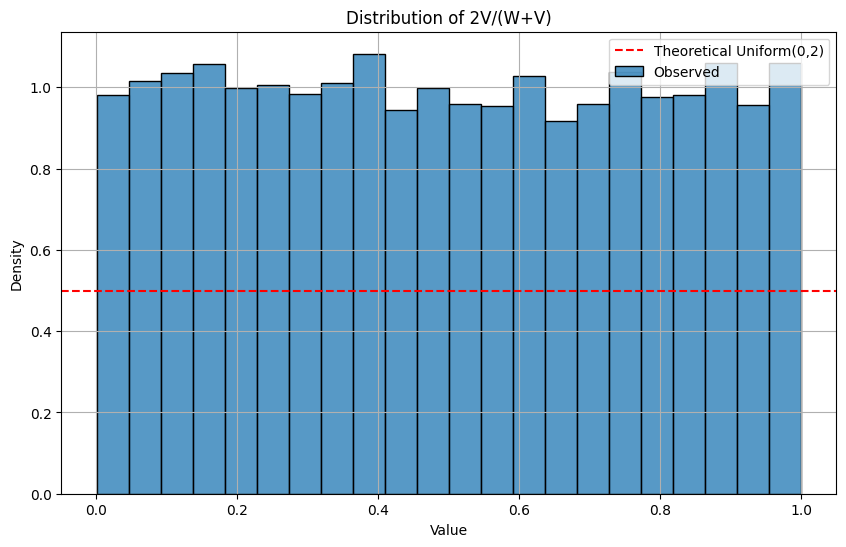


Statistical Summary:
--------------------------------------------------
P(V = T1) = 0.509 (Theoretical: 0.500)

Testing uniformity of 2V/(W+V):
KS-test p-value: 0.000
Mean: 0.499 (Should be 1.0)
Std: 0.290 (Should be 0.577)

Case 2: λ1 = 1, λ2 = 2


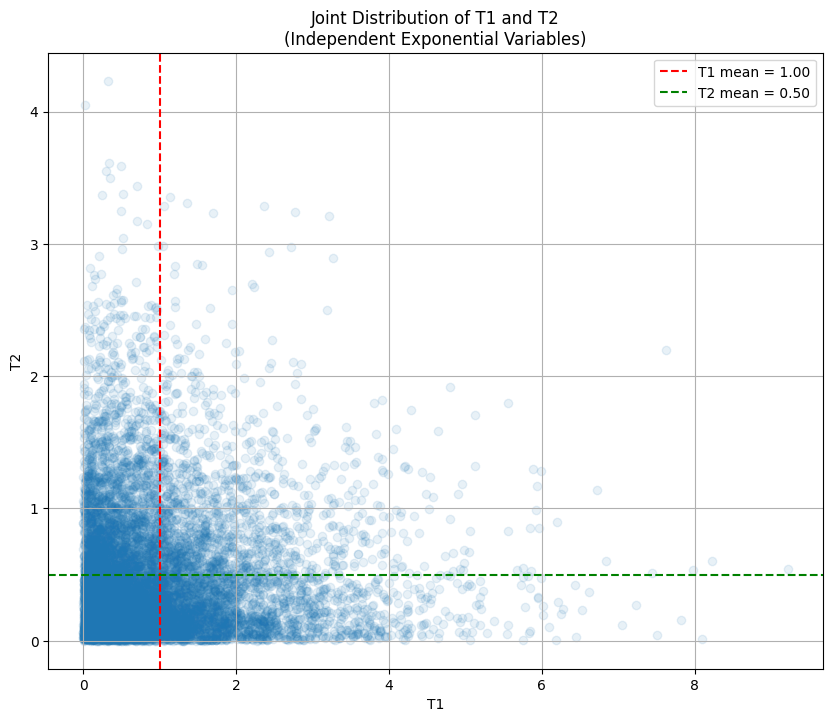

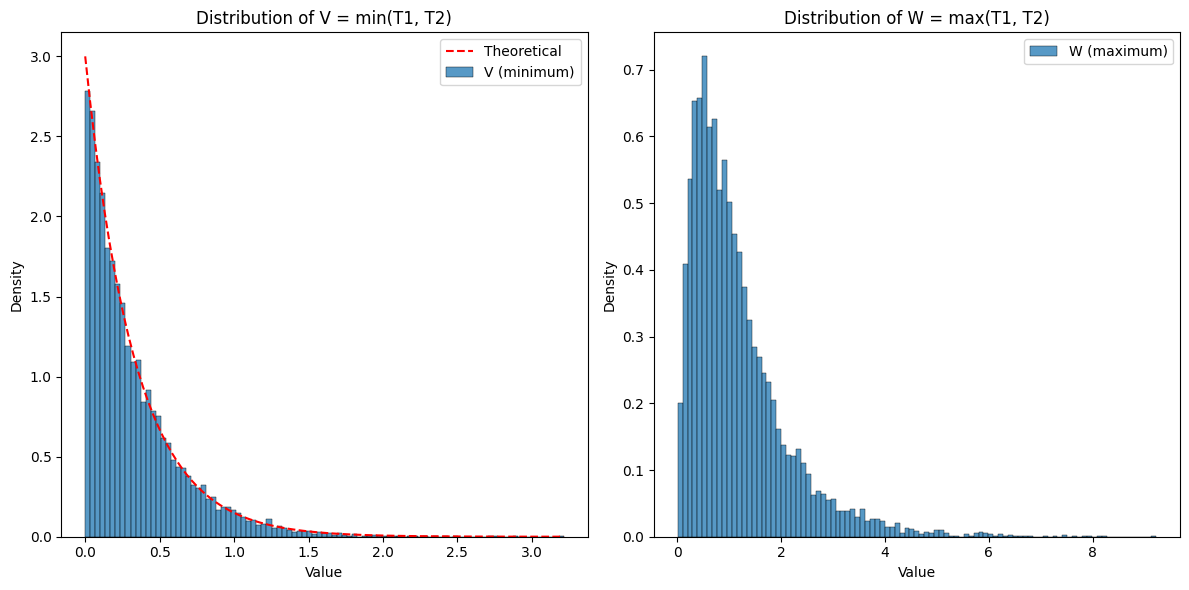

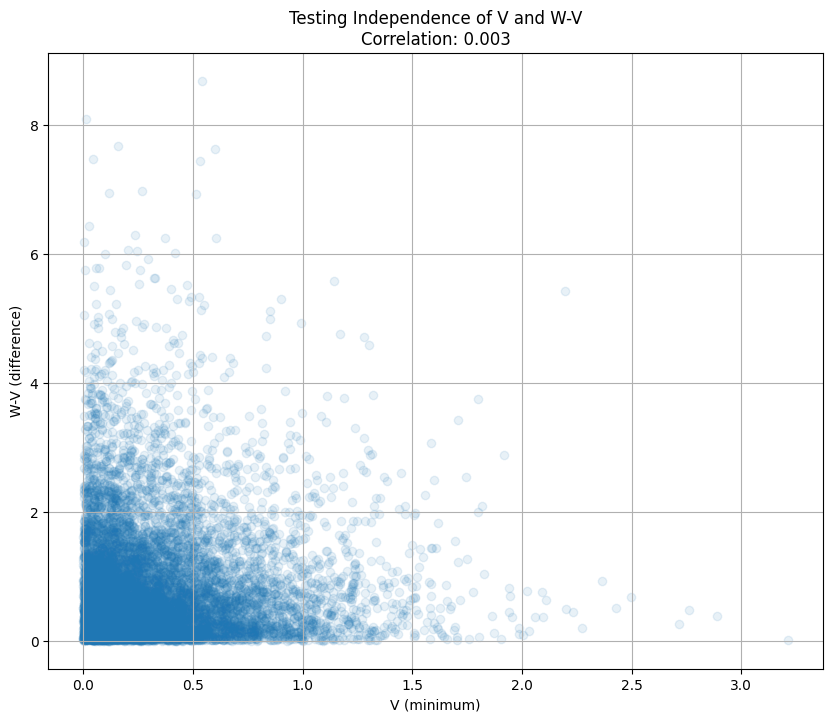

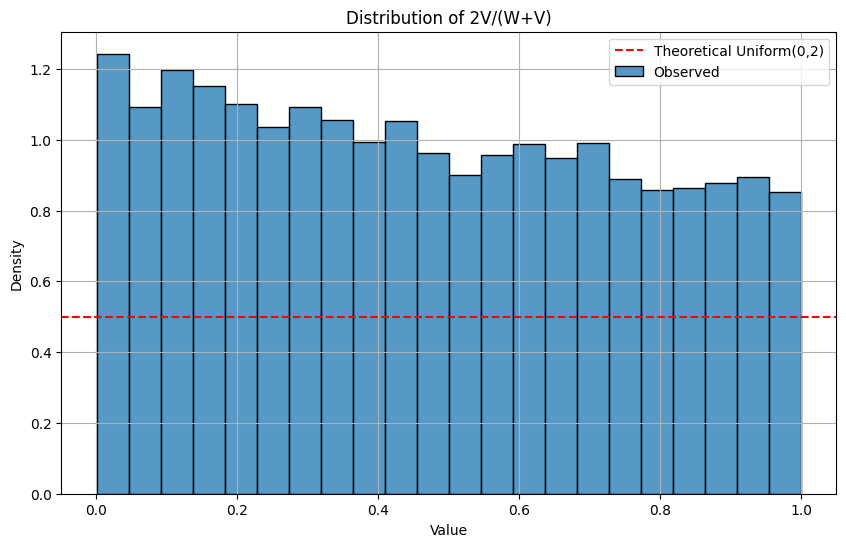


Statistical Summary:
--------------------------------------------------
P(V = T1) = 0.336 (Theoretical: 0.333)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class ExponentialOrderStatistics:
    def __init__(self, lambda1, lambda2, n_samples=10000):
        """
        Initialize the simulation with parameters for two exponential distributions
        and number of samples to generate.
        
        Parameters:
        -----------
        lambda1 : float
            Rate parameter for first exponential distribution
        lambda2 : float
            Rate parameter for second exponential distribution
        n_samples : int
            Number of samples to generate for simulation
        """
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.n_samples = n_samples
        
        # Generate the random samples
        self.T1 = np.random.exponential(1/lambda1, n_samples)
        self.T2 = np.random.exponential(1/lambda2, n_samples)
        
        # Calculate V (minimum) and W (maximum)
        self.V = np.minimum(self.T1, self.T2)
        self.W = np.maximum(self.T1, self.T2)
        
        # Calculate W-V (the difference)
        self.W_minus_V = self.W - self.V
        
        # Calculate 2V/(W+V)
        self.ratio = 2 * self.V / (self.W + self.V)

    def plot_original_distributions(self):
        """
        Create a scatter plot of original T1 vs T2 samples to visualize
        their joint distribution and independence.
        """
        plt.figure(figsize=(10, 8))
        plt.scatter(self.T1, self.T2, alpha=0.1)
        plt.xlabel('T1')
        plt.ylabel('T2')
        plt.title('Joint Distribution of T1 and T2\n(Independent Exponential Variables)')
        
        # Add theoretical mean lines
        plt.axvline(1/self.lambda1, color='r', linestyle='--', 
                   label=f'T1 mean = {1/self.lambda1:.2f}')
        plt.axhline(1/self.lambda2, color='g', linestyle='--', 
                   label=f'T2 mean = {1/self.lambda2:.2f}')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_min_max_distributions(self):
        """
        Plot the distributions of V (minimum) and W (maximum) to visualize
        their probability densities.
        """
        plt.figure(figsize=(12, 6))
        
        # Create histogram for V (minimum)
        plt.subplot(1, 2, 1)
        sns.histplot(self.V, stat='density', label='V (minimum)')
        plt.title('Distribution of V = min(T1, T2)')
        plt.xlabel('Value')
        plt.ylabel('Density')
        
        # Add theoretical density for minimum
        x = np.linspace(0, max(self.V), 100)
        theoretical_v = (self.lambda1 + self.lambda2) * np.exp(-(self.lambda1 + self.lambda2) * x)
        plt.plot(x, theoretical_v, 'r--', label='Theoretical')
        plt.legend()
        
        # Create histogram for W (maximum)
        plt.subplot(1, 2, 2)
        sns.histplot(self.W, stat='density', label='W (maximum)')
        plt.title('Distribution of W = max(T1, T2)')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

    def plot_independence_test(self):
        """
        Visualize the independence of V and W-V when λ1 = λ2
        through scatter plot and correlation analysis.
        """
        plt.figure(figsize=(10, 8))
        plt.scatter(self.V, self.W_minus_V, alpha=0.1)
        plt.xlabel('V (minimum)')
        plt.ylabel('W-V (difference)')
        plt.title('Testing Independence of V and W-V\n'
                 f'Correlation: {np.corrcoef(self.V, self.W_minus_V)[0,1]:.3f}')
        plt.grid(True)
        plt.show()

    def plot_ratio_distribution(self):
        """
        Plot the distribution of 2V/(W+V) and compare with theoretical
        uniform distribution on [0,2].
        """
        plt.figure(figsize=(10, 6))
        
        # Plot histogram of ratio
        sns.histplot(self.ratio, stat='density', label='Observed')
        
        # Add theoretical uniform density line
        plt.axhline(y=0.5, color='r', linestyle='--', label='Theoretical Uniform(0,2)')
        
        plt.title('Distribution of 2V/(W+V)')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.show()

    def print_statistics(self):
        """
        Print various statistical measures to verify our theoretical results.
        """
        print("\nStatistical Summary:")
        print("-" * 50)
        
        # Probability that V = T1
        p_v_equals_t1 = np.mean(self.T1 < self.T2)
        theoretical_p = self.lambda1 / (self.lambda1 + self.lambda2)
        print(f"P(V = T1) = {p_v_equals_t1:.3f} (Theoretical: {theoretical_p:.3f})")
        
        # Test uniformity of ratio when λ1 = λ2
        if self.lambda1 == self.lambda2:
            ks_stat, p_value = stats.kstest(self.ratio, 'uniform', args=(0, 2))
            print(f"\nTesting uniformity of 2V/(W+V):")
            print(f"KS-test p-value: {p_value:.3f}")
            print(f"Mean: {np.mean(self.ratio):.3f} (Should be 1.0)")
            print(f"Std: {np.std(self.ratio):.3f} (Should be {np.sqrt(1/3):.3f})")

# Example usage and demonstration
def main():
    # Case 1: λ1 = λ2 = 1 (symmetric case)
    print("\nCase 1: λ1 = λ2 = 1")
    sim1 = ExponentialOrderStatistics(1, 1)
    sim1.plot_original_distributions()
    sim1.plot_min_max_distributions()
    sim1.plot_independence_test()
    sim1.plot_ratio_distribution()
    sim1.print_statistics()
    
    # Case 2: λ1 ≠ λ2 (asymmetric case)
    print("\nCase 2: λ1 = 1, λ2 = 2")
    sim2 = ExponentialOrderStatistics(1, 2)
    sim2.plot_original_distributions()
    sim2.plot_min_max_distributions()
    sim2.plot_independence_test()
    sim2.plot_ratio_distribution()
    sim2.print_statistics()

if __name__ == "__main__":
    # Set random seed for reproducibility
    np.random.seed(42)
    main()